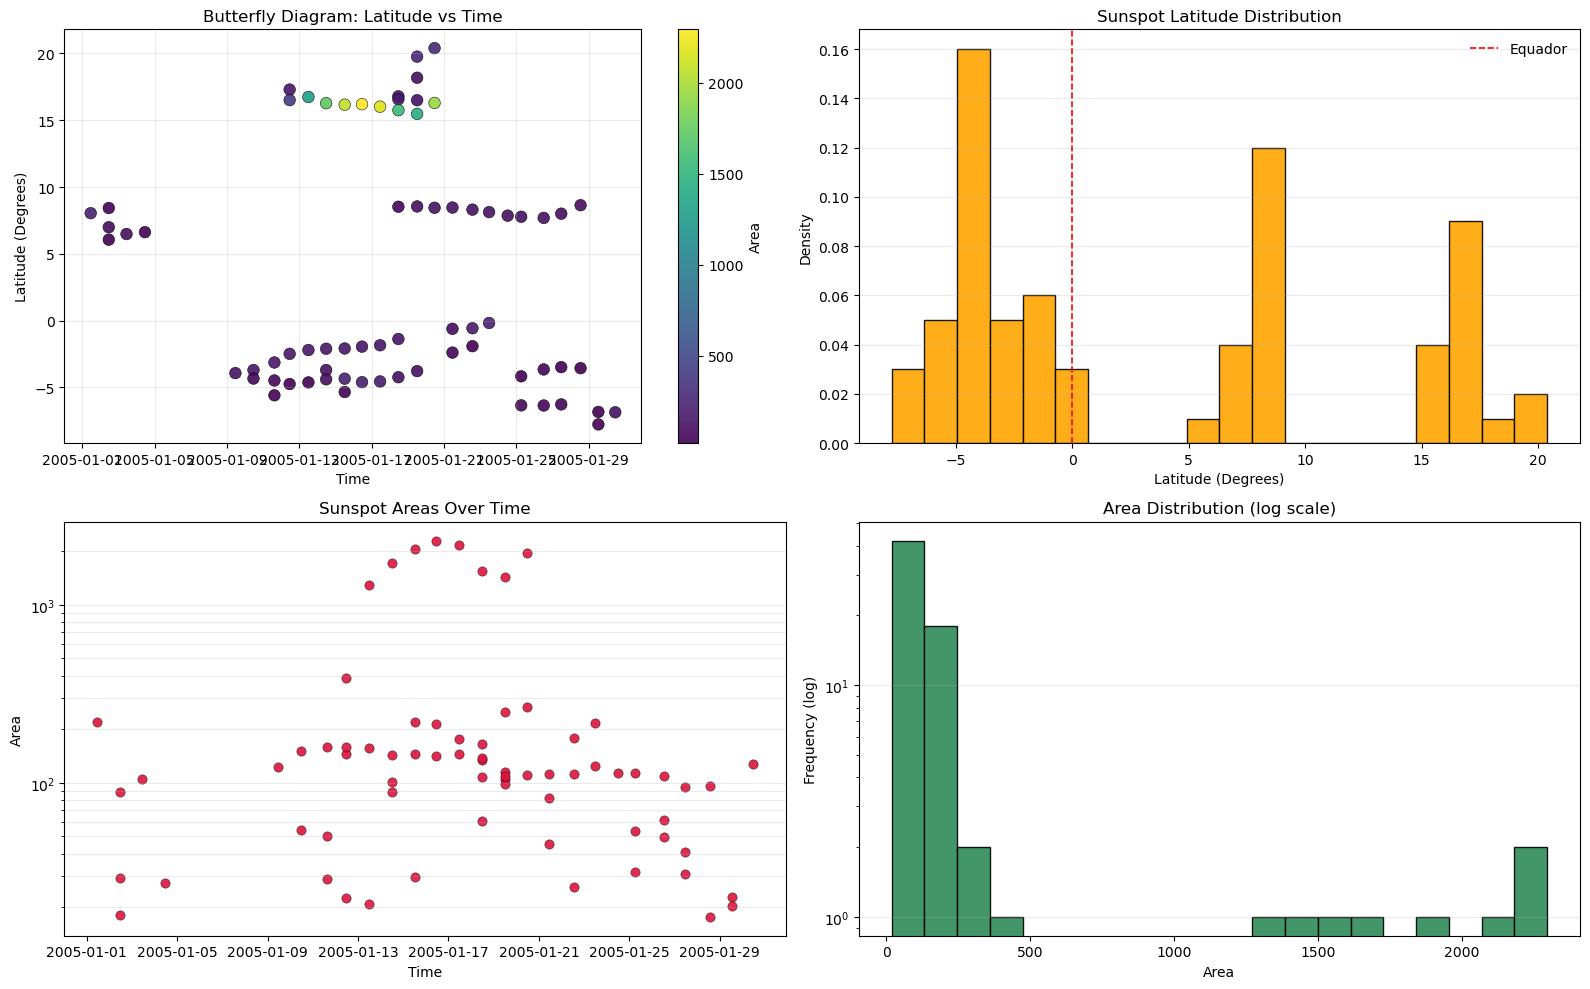

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


CSV = "Sunspots.csv"           
START = pd.Timestamp("2005-01-01")  
N_DAYS = 30                    


df = pd.read_csv(CSV)

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Lat"]  = pd.to_numeric(df["Lat"], errors="coerce")
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")


df = df.dropna(subset=["Date", "Lat", "Area"])


end = START + timedelta(days=N_DAYS)
mask = (df["Date"] >= START) & (df["Date"] < end)
d = df.loc[mask].copy()


plt.figure(figsize=(16, 10))


ax1 = plt.subplot(2, 2, 1)
sc = ax1.scatter(d["Date"], d["Lat"],
                 c=d["Area"], cmap="viridis",
                 s=70, edgecolors="black", linewidths=0.4, alpha=0.9)
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label("Area")
ax1.set_title("Butterfly Diagram: Latitude vs Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("Latitude (Degrees)")
ax1.grid(True, alpha=0.25)


ax2 = plt.subplot(2, 2, 2)
ax2.hist(d["Lat"].values, bins=20, density=True,
         color="orange", edgecolor="black", alpha=0.9)
ax2.axvline(0, color="red", linestyle="--", linewidth=1.2, label="Equador")
ax2.legend(frameon=False)
ax2.set_title("Sunspot Latitude Distribution")
ax2.set_xlabel("Latitude (Degrees)")
ax2.set_ylabel("Density")
ax2.grid(True, axis="y", alpha=0.25)


ax3 = plt.subplot(2, 2, 3)
ax3.scatter(d["Date"], d["Area"],
            color="crimson", s=45,
            edgecolors="black", linewidths=0.3, alpha=0.9)
ax3.set_yscale("log")
ax3.set_title("Sunspot Areas Over Time")
ax3.set_xlabel("Time")
ax3.set_ylabel("Area")
ax3.grid(True, which="both", axis="y", alpha=0.25)


ax4 = plt.subplot(2, 2, 4)
ax4.hist(d["Area"].values, bins=20, log=True,
         color="seagreen", edgecolor="black", alpha=0.9)
ax4.set_title("Area Distribution (log scale)")
ax4.set_xlabel("Area")
ax4.set_ylabel("Frequency (log)")
ax4.grid(True, axis="y", alpha=0.25)

plt.tight_layout()
plt.savefig('Fig_1.jpeg', dpi=600, format='jpeg',  bbox_inches='tight')
plt.show()
